## Determining the coffee shop concentration in South Korea
##### by 최용호 Aug.06.2019

In [2]:
from urllib.request import urlopen
import json
import pandas as pd
from bs4 import BeautifulSoup

### Starbucks
finding all locations of starbucks in Korea using starbucks finder on their website

In [9]:
url_base = "https://www.istarbucks.co.kr"
url_sub = "/store/store_map.do"
url = url_base+url_sub

html = urlopen(url)
soup = BeautifulSoup(html,"html.parser")

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="website" property="og:type"/>
<meta content="Starbucks" property="og:title"/>
<meta content="http://www.istarbucks.co.kr/" property="og:url"/>
<meta content="http://www.istarbucks.co.kr/common/img/kakaotalk.png" property="og:image"/>
<meta content="Starbucks" property="og:description"/>
<title id="titleJoin">Starbucks Coffee Korea</title>
<link href="/common/img/common/favicon.ico" rel="shortcut icon" type="image/ico"/>
<link href="/common/css/reset.css" rel="stylesheet"/>
<link href="/common/css/style.css?v=190418" rel="stylesheet"/>
<link href="/common/css/jquery.bxslider.css" rel="stylesheet"/>
<link href="/common/css/idangerous.swiper.css" rel="stylesheet"/>
<link href="/common/css/idangerous.swiper.scrollbar.css" rel="sty

In [7]:
print(soup.find_all('div','result_num_wrap'))

[<div class="result_num_wrap myStoreInfo">
<!-- 검색결과 없는 경우 -->
<!--strong>검색 결과</strong>(<span class="en t_006633">0</span>개)-->
<!-- 검색결과 있는 경우 -->
<strong class="quickSearchResultCtn"></strong> (검색 결과 <span class="en t_006633 resultCtnNumberTab1">0</span>개)<br/>
<span class="store_pop_info"><img alt="" src="/common/img//store/icon_fav_off.png"/> 클릭하여 나만의 매장을 등록하세요.</span>
</div>, <div class="result_num_wrap">
<!-- 검색결과 없는 경우 -->
<!--strong>검색 결과</strong>(<span class="en t_006633">0</span>개)-->
<!-- 검색결과 있는 경우 -->
<strong class="gugunSelectName"></strong> (검색 결과 <span class="en t_006633 sidoSetResult">0</span>개)
													</div>]


In [14]:
import bs4
import requests
stbuck = requests.get('https://www.istarbucks.co.kr/store/store_map.do')
st_bs = bs4.BeautifulSoup(stbuck.text, 'lxml')
st_bs.find_all('li',class_='quickREsultLstCon')

[]

In [153]:
from selenium import webdriver

chromedriver_dir = "C:/Users/709-000/Desktop/til/Python/ChromeWebdriver/chromedriver.exe"
driver = webdriver.Chrome(chromedriver_dir)

In [154]:
driver.get(url)

In [157]:
loca = driver.find_element_by_class_name('loca_search')
loca.click()

In [103]:
sido = driver.find_element_by_class_name('sido_arae_box')
li = sido.find_elements_by_tag_name('li')
li[0].click()

In [93]:
gugun = driver.find_element_by_class_name('gugun_arae_box')
guli = gugun.find_elements_by_tag_name('li')
guli[0].click()

In [31]:
source = driver.page_source

In [32]:
bs = BeautifulSoup(source,'lxml')
entire = bs.find('ul',class_='quickSearchResultBoxSidoGugun')
li_list=entire.find_all('li')

In [135]:
import re 
for infor in li_list:
    print(re.split(' ',infor.find('p').text)[2]+ " " + re.split(' ',infor.find('p').text)[3])

for infor in li_list:
    print(re.split(' ',infor.find('p').text))
    

안덕면 신화역사로304번길
대정읍 에듀시티로
성산읍 일출로
천제연로 95(색달동)064-738-8915
중정로 53
형제해안로 322
일주서로 11
성산읍 일출로
중문관광로110번길 32
중앙로 215
조천읍 조함해안로
연북로 12
애월읍 애월해안로
관덕로 55
도령로 27
서해안로 380
1100로 3348,
['제주특별자치도', '서귀포시', '안덕면', '신화역사로304번길', '38', 'B1-29064-908-1729']
['제주특별자치도', '서귀포시', '대정읍', '에듀시티로', '36', '064-792-3371']
['제주특별자치도', '서귀포시', '성산읍', '일출로', '80', '064-782-3273']
['제주특별자치도', '서귀포시', '천제연로', '95(색달동)064-738-8915']
['제주특별자치도', '서귀포시', '중정로', '53', '(서귀동)064-763-8707']
['제주특별자치도', '서귀포시', '형제해안로', '322', '(상모리)064-792-8731']
['제주특별자치도', '서귀포시', '일주서로', '11', '(강정동)064-738-5943']
['제주특별자치도', '서귀포시', '성산읍', '일출로', '284-5,', '1,2층064-782-8535']
['제주특별자치도', '서귀포시', '중문관광로110번길', '32', '(색달동)064-738-8510']
['제주특별자치도', '제주시', '중앙로', '215', '(이도이동)064-756-3511']
['제주특별자치도', '제주시', '조천읍', '조함해안로', '522', '064-783-3537']
['제주특별자치도', '제주시', '연북로', '12', '(노형동)064-746-3367']
['제주특별자치도', '제주시', '애월읍', '애월해안로', '376', '064-799-3273']
['제주특별자치도', '제주시', '관덕로', '55', '(일도일동)064-757-9892']
['제주특별자치도', '제주시', '도령로

In [158]:
from tqdm import tqdm_notebook
import time

loca.click()

city = []
gu = []    
address = []

bar_total = tqdm_notebook() 
for i in tqdm_notebook(range(len(li)-1)): 
    sido = driver.find_element_by_class_name('sido_arae_box')
    li = sido.find_elements_by_tag_name('li')
    li[i].click()
    time.sleep(5)

    gugun = driver.find_element_by_class_name('gugun_arae_box')
    guli = gugun.find_elements_by_tag_name('li')
    guli[0].click()
    time.sleep(5)

    source = driver.page_source
    bs = BeautifulSoup(source,'lxml')
    entire = bs.find('ul',class_='quickSearchResultBoxSidoGugun')
    li_list=entire.find_all('li')
    for item in li_list: 
        city.append(re.split(' ',item.find('p').text)[0])
        gu.append(re.split(' ',item.find('p').text)[1])
        address.append(re.split(' ',infor.find('p').text)[2]+ " " + re.split(' ',infor.find('p').text)[3])
        time.sleep(0.05)
    loca.click()


In [62]:
len(guli)

26

In [138]:
city_coffee = []
for i in city: 
    city_coffee.append(i[0:2]) 
city_coffee[-50:]

['충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '충청',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주',
 '제주']

In [143]:
import pandas as pd 
import numpy as np 

starbucks = {'도시':city, '행정구역':gu}
df_stbcks = pd.DataFrame(starbucks)
df_stbcks["Num"] = 1
df_stbcks.head()

,도시,행정구역,Num
0,서울특별시,강남구,1
1,서울특별시,강남구,1
2,서울특별시,강남구,1
3,서울특별시,강남구,1
4,서울특별시,강남구,1


In [149]:
a = pd.pivot_table(df_stbcks,
              index = ["도시","행정구역"],
               values = 'Num', aggfunc=np.sum)

a.to_csv('스타벅스 수.csv',encoding = "EUC-KR")

In [150]:
a

Num
도시      행정구역     
강원도     강릉시     3
        고성군     1
        동해시     1
        속초시     3
        원주시     6
        춘천시     5
        홍천군     3
경기      구리시     1
        남양주시    1
        의정부시    1
경기도     고양시    32
        과천시     3
        광명시     8
        광주시     2
        구리시     2
        군포시     4
        김포시     8
        남양주시    6
        동두천시    2
        부천시    13
        성남시    40
        수원시    26
        시흥시     5
        안산시     9
        안성시     2
        안양시    13
        양주시     4
        양평군     1
        여주시     3
        오산시     3
...           ...
인천광역시   남동구     9
        동구      1
        미추홀구    4
        부평구     9
        서구      6
        연수구    10
        중구      7
전라남도    광양시     1
        나주시     1
        목포시     5
        무안군     1
        순천시     4
        여수시     5
전라북도    군산시     2
        익산시     3
        전주시    12
        정읍시     1
전북      전주시     1
제주특별자치도 서귀포시    9
        제주시     8
충청남도    계룡시     1
        공주시     2
        논산시     1
        당진시     2
        서산시     2
        아산시     4
        천안시    15
충청북도    제천시     1
        청주시    15
        충주시     4

[153 rows x 1 columns]

In [160]:
draw_korea_raw = pd.read_excel('data/05. draw_korea_raw.xlsx', encoding="EUC-KR")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [162]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                             inplace = True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [163]:
draw_korea = draw_korea_raw_stacked

In [164]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #jnoejoe
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

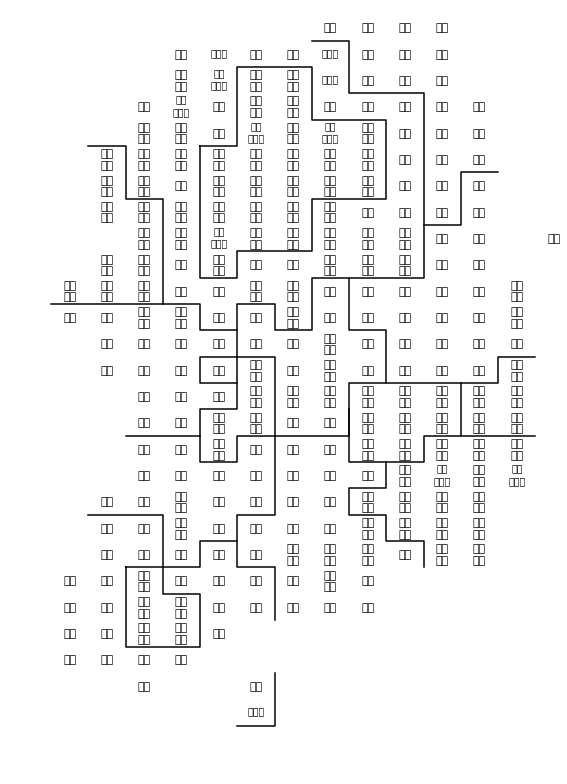

In [167]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()